In [499]:
# importing the libraries for the assignment
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [500]:
# Reading the data set
Bk_share = pd.read_csv('C:\\Users\\manas.modi\\Desktop\\day.csv')

In [501]:
# Checking the data set for all columns and their respective values
Bk_share

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [502]:
Bk_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [503]:
# Describing the columns with respective of mean, std deviation and other measures 
Bk_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [504]:
# Check for column entries, data type and count of data 
Bk_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [505]:
# Check the value counts for season  and weathersit columns
Bk_share.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [506]:
# Creating dummies for the season and weathersit and dropping columns 
status = pd.get_dummies(Bk_share['season'], drop_first =True, prefix ='season')
Bk_share = pd.concat([Bk_share,status], axis=1) 
Bk_share

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,0,0
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,0,0
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,0,0
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0,0


# new columns for categorical column: - season
1. season_2 - SUMMER
2. season_3 - FALL
3. season_4 - WINTER
4. season_1 - dropped using drop_first(SPRING)

In [507]:
status = pd.get_dummies(Bk_share['weathersit'], drop_first =True, prefix ='weathersit')
Bk_share = pd.concat([Bk_share,status], axis=1) 
Bk_share

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,...,65.2917,23.458911,247,1867,2114,0,0,0,1,0
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,...,59.0000,10.416557,644,2451,3095,0,0,0,1,0
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,...,75.2917,8.333661,159,1182,1341,0,0,0,1,0
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,...,48.3333,23.500518,364,1432,1796,0,0,0,0,0


# new columns for categorical column weathersit 
1. weathersit_2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
2. weathersit_3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
3. weathersit_1 - dropped using drop_first(Clear, Few clouds, Partly cloudy, Partly cloudy)
4. no data in dataset for - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog so no dummy column created 

In [508]:
Bk_share = Bk_share.drop('season',axis=1)
Bk_share = Bk_share.drop('weathersit',axis=1)
Bk_share = Bk_share.drop('casual',axis=1)
Bk_share = Bk_share.drop('registered',axis=1)
Bk_share = Bk_share.drop('dteday',axis=1)

In [509]:
Bk_share

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,0,1,0
726,727,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,0,1,0
727,728,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,0,1,0
728,729,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,0,0


In [510]:
Bk_share = Bk_share.drop('instant',axis=1)

In [511]:
Bk_share

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,0,1,0
726,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,0,1,0
727,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,0,1,0
728,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,0,0


# Visualing the Data

In [512]:
Bk_share.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.336986,0.028767
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.473004,0.167266
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


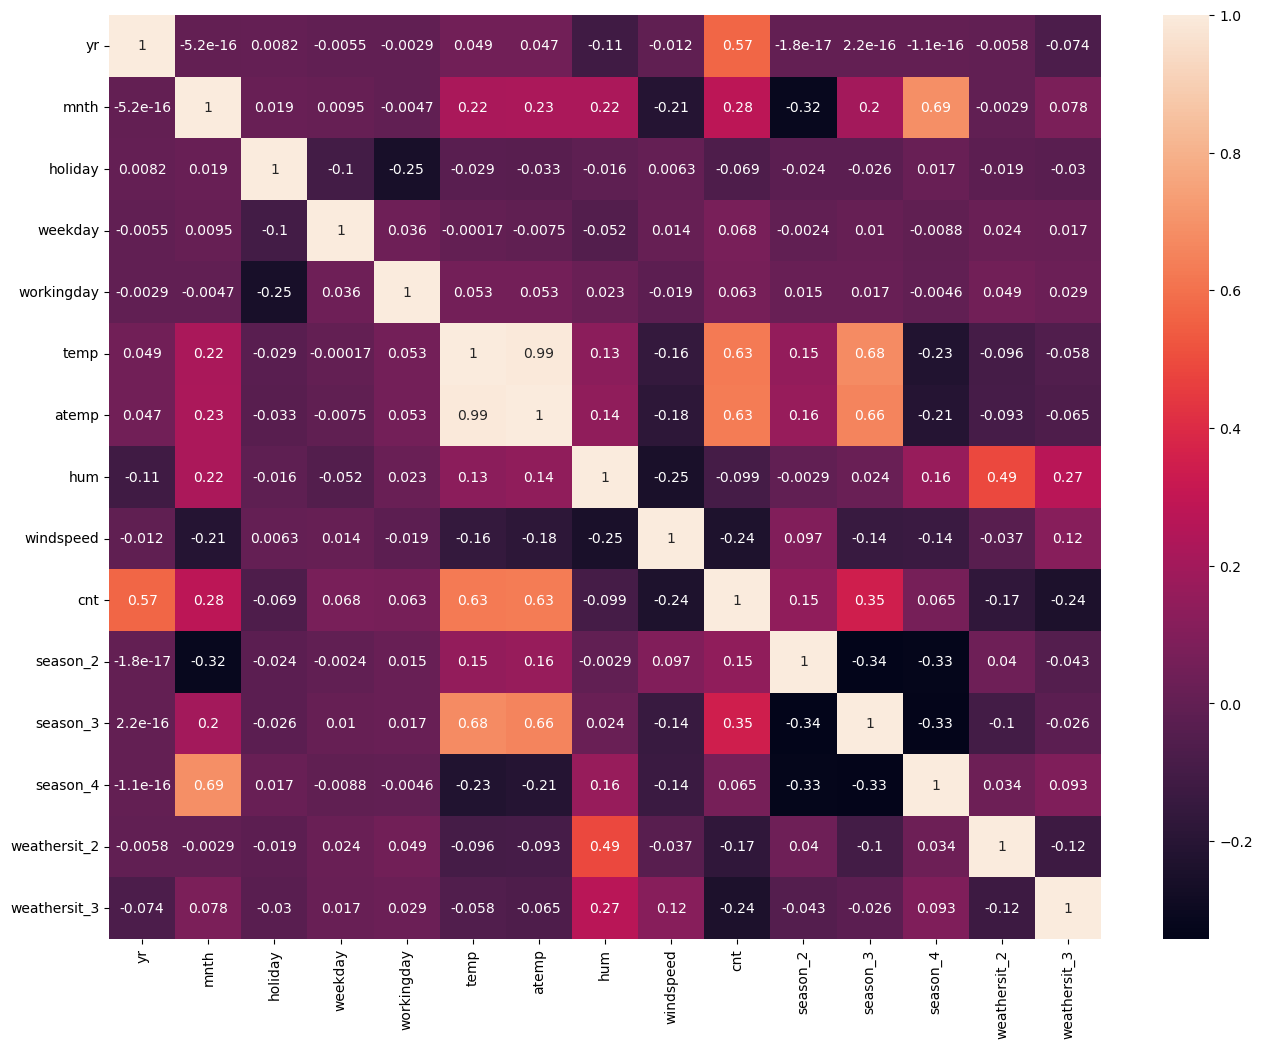

In [513]:
# plotting the filtered data to check on correlation with the target variable
plt.figure(figsize =(16,12))
sns.heatmap(Bk_share.corr(), annot =True)
plt.show()

# Observations
1. Temp and atemp has highest positive correlation with cnt followed by yr, season 3, mnth and so on
2. Weathersit_3 haas highest negative correlation with cnt followed by weathersit_2, windspeed. 

In [514]:
Bk_share.weathersit_2.value_counts()

0    484
1    246
Name: weathersit_2, dtype: int64

In [515]:
Bk_share.weathersit_3.value_counts()

0    709
1     21
Name: weathersit_3, dtype: int64

In [516]:
Bk_share.season_3.value_counts()

0    542
1    188
Name: season_3, dtype: int64

In [517]:
Bk_share.season_2.value_counts()

0    546
1    184
Name: season_2, dtype: int64

In [518]:
Bk_share.season_4.value_counts()

0    552
1    178
Name: season_4, dtype: int64

# Observations
1. People take more bikes in Fall, followed by summer, spring and lastly winter
2. People tend to have shared bikes in clear weather when compared to any other weather

In [519]:
Bk_share.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [520]:
Bk_share.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

## Observations
1. People take bikes differently in every month but it can be deduced that it also follows same relation as season

In [521]:
Bk_share.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [522]:
Bk_share.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [523]:
Bk_share.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

# Observations
1. People tend to take more bikes on working days than holidays or weekend
2. Amongst weekdays, People tend to take bikes on 0,1 and 6th day of the week

In [524]:
Bk_share.shape

(730, 15)

In [525]:
# plotting variables using various plots   
def box_plot(df, ft):
    df.boxplot(ft)
    plt.grid(False)
    plt.show()

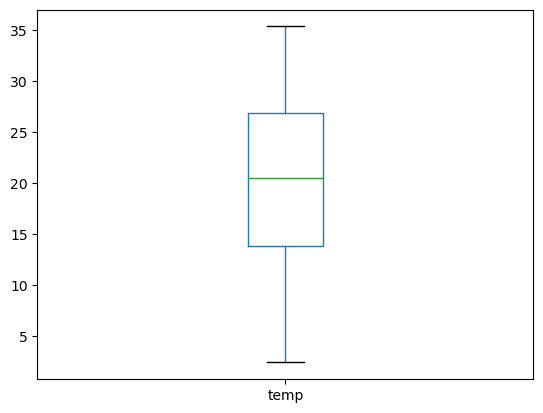

In [526]:
box_plot(Bk_share, "temp")

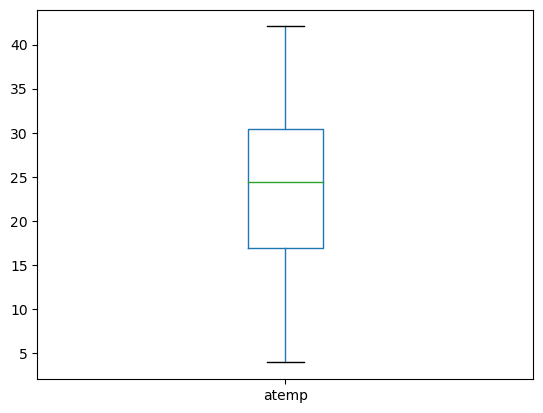

In [527]:
box_plot(Bk_share, "atemp")

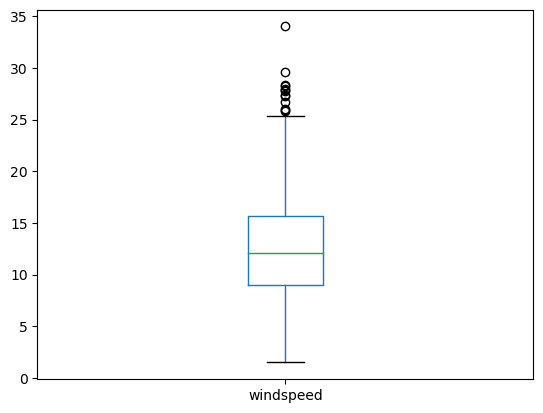

In [528]:
box_plot(Bk_share, "windspeed")

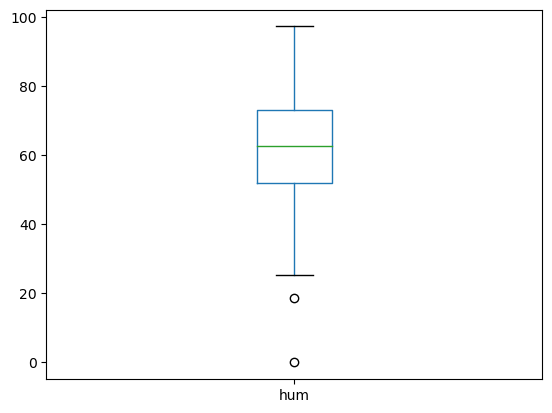

In [529]:
box_plot(Bk_share, "hum")

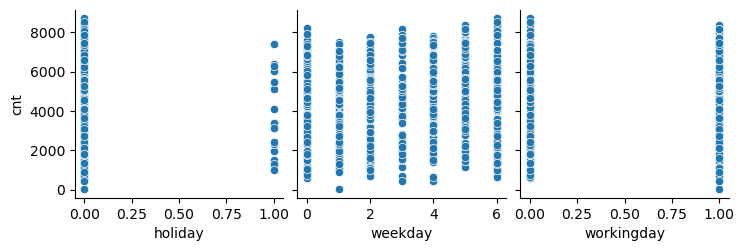

In [530]:
sns.pairplot(data = Bk_share, y_vars = 'cnt', x_vars = ['holiday','weekday','workingday'])
plt.show()

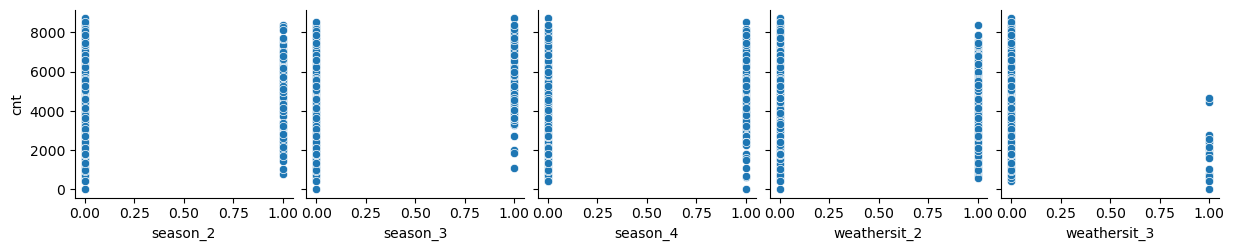

In [531]:
sns.pairplot(data = Bk_share, y_vars = 'cnt', x_vars = ['season_2', 'season_3','season_4','weathersit_2', 'weathersit_3'])
plt.show()

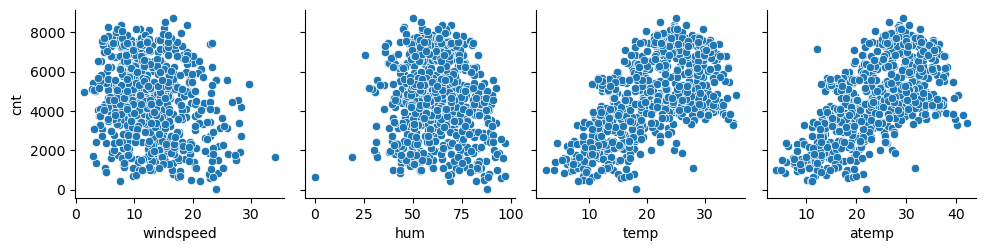

In [532]:
sns.pairplot(data = Bk_share, y_vars = 'cnt', x_vars = ['windspeed', 'hum','temp','atemp'])
plt.show()

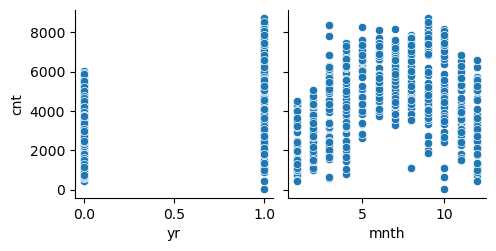

In [533]:
sns.pairplot(data = Bk_share, y_vars = 'cnt', x_vars = ['yr','mnth'])
plt.show()

# Observations
1. There are more numbers of shared bikes in 2019 than 2018
2. The spread of shared bikers are more in the the middle months when compared to starting or ending months of the year. 
3. temp - It has a properly scattered distribution over the positive slope of the data. With increase in temperature the cnt is increasing
4. atemp - It has a properly scattered distribution over the positive slope of the data. With increase in temperature the cnt is increasing 

# Distributing the dataset into train and test data sets

In [534]:
# Splitting the dataset in training and test data set  
df_train,df_test=train_test_split(Bk_share, train_size =0.70,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


In [535]:
# Using Minmaxscaler function to bring all variables to range of 0 to 1
scaler =MinMaxScaler()
num_vars = ['mnth','yr','holiday','workingday','weekday','temp','atemp','hum','windspeed','weathersit_2','weathersit_3','season_2','season_3','season_4','cnt']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars]) 
df_train[num_vars]

,mnth,yr,holiday,workingday,weekday,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,cnt
576,0.545455,1.0,0.0,1.0,0.333333,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,1.0,0.0,0.827658
426,0.181818,1.0,0.0,0.0,1.000000,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,0.465255
728,1.000000,1.0,0.0,0.0,0.000000,0.245101,0.200348,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0,0.204096
482,0.272727,1.0,0.0,0.0,1.000000,0.395666,0.391735,0.504508,0.188475,1.0,0.0,1.0,0.0,0.0,0.482973
111,0.272727,0.0,0.0,1.0,0.833333,0.345824,0.318819,0.751824,0.380981,1.0,0.0,1.0,0.0,0.0,0.191095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.636364,1.0,0.0,1.0,0.666667,0.863973,0.824359,0.679690,0.187140,0.0,0.0,0.0,1.0,0.0,0.832835
53,0.090909,0.0,0.0,1.0,0.500000,0.202618,0.218747,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0,0.218017
350,1.000000,0.0,0.0,0.0,1.000000,0.248216,0.223544,0.577930,0.431816,1.0,0.0,0.0,0.0,1.0,0.312586
79,0.181818,0.0,0.0,1.0,0.166667,0.462664,0.434043,0.759870,0.529881,1.0,0.0,1.0,0.0,0.0,0.236424


In [536]:
df_train[num_vars].describe()

,mnth,yr,holiday,workingday,weekday,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503743,0.507843,0.025490,0.676471,0.498366,0.537440,0.513156,0.650480,0.320883,0.345098,0.029412,0.247059,0.262745,0.247059,0.513499
std,0.315038,0.500429,0.157763,0.468282,0.336182,0.225858,0.212410,0.145846,0.169803,0.475867,0.169124,0.431725,0.440557,0.431725,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.000000,0.000000,0.166667,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.356420
50%,0.545455,1.000000,0.000000,1.000000,0.500000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.518638
75%,0.818182,1.000000,0.000000,1.000000,0.833333,0.735215,0.688457,0.754830,0.414447,1.000000,0.000000,0.000000,1.000000,0.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [537]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,1.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0.0,0.0,0.0,1.0,0.0
728,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0.0,0.0,0.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,1.0,0.0,0.0,1.0,0.0
111,0.0,0.272727,0.0,0.833333,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,1.0,0.0,0.0,1.0,0.0


In [538]:
# Declaring the X and y variable for model building and training data
y_train =df_train.pop('cnt')
X_train =df_train

In [539]:
X_train

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.0,1.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.0,0.0,0.0,1.0,0.0
728,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,1.0,0.0,0.0,1.0,0.0
111,0.0,0.272727,0.0,0.833333,1.0,0.345824,0.318819,0.751824,0.380981,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.636364,0.0,0.666667,1.0,0.863973,0.824359,0.679690,0.187140,0.0,1.0,0.0,0.0,0.0
53,0.0,0.090909,0.0,0.500000,1.0,0.202618,0.218747,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0
350,0.0,1.000000,0.0,1.000000,0.0,0.248216,0.223544,0.577930,0.431816,0.0,0.0,1.0,1.0,0.0
79,0.0,0.181818,0.0,0.166667,1.0,0.462664,0.434043,0.759870,0.529881,1.0,0.0,0.0,1.0,0.0


In [540]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

## Data Modelling and training using all variables 
- Check for R Squared 
- Check for VIF values

On the basis of the below conditions, variables will removed 
- High p values, low VIF
- High VIF, low p values

A right model would be generated and trained

In [541]:
Bk_share.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [542]:
# Adding constant to make a linear regression line
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
lr_model = lr
lr_model.summary()                       # model summary - Provides various parameter values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.01e-182
Time:                        12:17:25   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1705      0.030      5.741      0.000       0.112       0.229
yr               0.2322      0.008     27.702      0.000       0.216       0.249
mnth             0.0149      0.026      0.578      0.563      -0.036       0.066
holiday         -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday          0.0483      0.012      3.878      0.000       0.024       0.073
workingday       0.0187      0.009      2.059      0.040       0.001       0.037
temp             0.4329      0.139      3.118      0.002       0.160       0.706
atemp            0.0628      0.142      0.443      0.658      -0.216       0.342
hum             -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed       -0.1783      0.027     -6.597      0.000      -0.231      -0.125
season_2         0.1168      0.016      7.488      0.000       0.086       0.147
season_3         0.0695      0.023      3.013      0.003       0.024       0.115
season_4         0.1529      0.022      6.907      0.000       0.109       0.196
weathersit_2    -0.0566      0.011     -5.203      0.000      -0.078      -0.035
weathersit_3    -0.2463      0.027     -9.024      0.000      -0.300      -0.193
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [543]:
# Initial VIF calculation for the model 
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending =False)  #Provides VIF values in descending order
vif

,Features,VIF
6,temp,57.99
7,atemp,53.56
0,const,52.10
11,season_3,6.09
12,season_4,5.39
2,mnth,3.89
10,season_2,2.67
8,hum,1.90
13,weathersit_2,1.58
14,weathersit_3,1.26


In [544]:
X_train_sm = X_train_sm.drop(["atemp"], axis=1)
lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
lr_model = lr
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.35e-183
Time:                        12:17:27   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1714      0.030      5.790      0.000       0.113       0.230
yr               0.2321      0.008     27.721      0.000       0.216       0.249
mnth             0.0150      0.026      0.581      0.561      -0.036       0.066
holiday         -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday          0.0480      0.012      3.864      0.000       0.024       0.072
workingday       0.0187      0.009      2.058      0.040       0.001       0.037
temp             0.4925      0.034     14.427      0.000       0.425       0.560
hum             -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed       -0.1807      0.027     -6.817      0.000      -0.233      -0.129
season_2         0.1169      0.016      7.501      0.000       0.086       0.148
season_3         0.0684      0.023      2.985      0.003       0.023       0.113
season_4         0.1532      0.022      6.928      0.000       0.110       0.197
weathersit_2    -0.0567      0.011     -5.218      0.000      -0.078      -0.035
weathersit_3    -0.2470      0.027     -9.079      0.000      -0.300      -0.194
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [545]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,const,51.85
10,season_3,6.02
11,season_4,5.39
2,mnth,3.89
6,temp,3.51
9,season_2,2.67
7,hum,1.90
12,weathersit_2,1.58
13,weathersit_3,1.25
8,windspeed,1.20


In [546]:
X_train_sm = X_train_sm.drop(["mnth"], axis=1)
lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
lr_model = lr
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.89e-184
Time:                        12:17:27   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1724      0.030      5.841      0.000       0.114       0.230
yr               0.2319      0.008     27.737      0.000       0.216       0.248
holiday         -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday          0.0484      0.012      3.906      0.000       0.024       0.073
workingday       0.0186      0.009      2.048      0.041       0.001       0.036
temp             0.4933      0.034     14.475      0.000       0.426       0.560
hum             -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed       -0.1803      0.026     -6.810      0.000      -0.232      -0.128
season_2         0.1188      0.015      7.818      0.000       0.089       0.149
season_3         0.0744      0.020      3.645      0.000       0.034       0.115
season_4         0.1636      0.013     12.579      0.000       0.138       0.189
weathersit_2    -0.0570      0.011     -5.261      0.000      -0.078      -0.036
weathersit_3    -0.2479      0.027     -9.132      0.000      -0.301      -0.195
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [547]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,const,51.66
9,season_3,4.78
5,temp,3.50
8,season_2,2.55
6,hum,1.88
10,season_4,1.87
11,weathersit_2,1.57
12,weathersit_3,1.25
7,windspeed,1.20
2,holiday,1.08


# Results
1. This is the final model becasue:
  a. The p value < 0.05 for all variables
  b. The VIF for all variables is also < 5, also it means it is avoiding high mulitcollinearity, which is one of the assumptions of linear regression 
  c. Adjusted R squared value is also 82.9% which pretty much says that the data model is good
  d. Prob(F-Statistics) is also 1.89e-184 which also states that the model is good fit
2. The target variable depends on season_3, temp, season_2, hum, season_4, weathersit_2, weathersit_3, windspeed, holiday, workingday, yr and weekday
3. The target variable doesnt depends on atemp and mnth. 
4. DW valus is 2.050 which means there is no autocollinearity , which is one of the assumptions of linear regression

In [548]:
X_train_sm

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1.0,1.0,0.0,0.333333,1.0,0.815169,0.725633,0.264686,0.0,1.0,0.0,0.0,0.0
426,1.0,1.0,0.0,1.000000,0.0,0.442393,0.640189,0.255342,0.0,0.0,0.0,1.0,0.0
728,1.0,1.0,0.0,0.000000,0.0,0.245101,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0
482,1.0,1.0,0.0,1.000000,0.0,0.395666,0.504508,0.188475,1.0,0.0,0.0,1.0,0.0
111,1.0,0.0,0.0,0.833333,1.0,0.345824,0.751824,0.380981,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,0.666667,1.0,0.863973,0.679690,0.187140,0.0,1.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.500000,1.0,0.202618,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0
350,1.0,0.0,0.0,1.000000,0.0,0.248216,0.577930,0.431816,0.0,0.0,1.0,1.0,0.0
79,1.0,0.0,0.0,0.166667,1.0,0.462664,0.759870,0.529881,1.0,0.0,0.0,1.0,0.0


In [549]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

# Model prediction on basis of the independent vaiables and target variable

In [550]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.777076
426    0.487822
728    0.343363
482    0.612670
111    0.300974
         ...   
578    0.837032
53     0.240528
350    0.299692
79     0.298466
520    0.653056
Length: 510, dtype: float64

<Axes: ylabel='Density'>

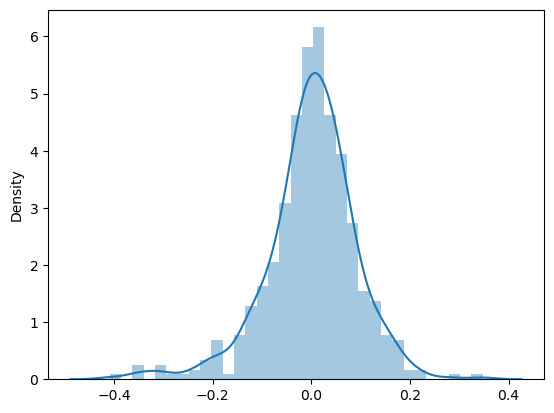

In [551]:
res = y_train - y_train_pred
sns.distplot(res)

# Observations
1. Residual distribution of the model should be normal which means that the assumptions of linear regression is satisfied

# Testing the model with the independent variables

In [552]:
num_vars = ['mnth','yr','holiday','workingday','weekday','temp','atemp','hum','windspeed','weathersit_2','weathersit_3','season_2','season_3','season_4','cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test[num_vars]

,mnth,yr,holiday,workingday,weekday,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,cnt
184,0.545455,0.0,1.0,0.0,0.166667,0.831783,0.769660,0.657364,0.084219,1.0,0.0,0.0,1.0,0.0,0.692706
535,0.454545,1.0,0.0,1.0,0.500000,0.901354,0.842587,0.610133,0.153728,0.0,0.0,1.0,0.0,0.0,0.712034
299,0.818182,0.0,0.0,1.0,0.666667,0.511964,0.496145,0.837699,0.334206,1.0,0.0,0.0,0.0,1.0,0.303382
221,0.636364,0.0,0.0,1.0,0.500000,0.881625,0.795343,0.437098,0.339570,0.0,0.0,0.0,1.0,0.0,0.547400
152,0.454545,0.0,0.0,1.0,0.666667,0.817246,0.741471,0.314298,0.537414,0.0,0.0,1.0,0.0,0.0,0.569029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.000000,1.0,0.0,1.0,0.333333,0.519232,0.511907,0.756118,0.283397,0.0,0.0,0.0,0.0,1.0,0.757478
127,0.363636,0.0,0.0,0.0,0.000000,0.584649,0.577380,0.650923,0.069510,0.0,0.0,1.0,0.0,0.0,0.495973
640,0.818182,1.0,0.0,1.0,0.500000,0.745598,0.682653,0.817947,0.052115,1.0,0.0,0.0,0.0,1.0,0.868615
72,0.181818,0.0,0.0,1.0,0.166667,0.331557,0.332005,0.512107,0.203418,0.0,0.0,0.0,0.0,0.0,0.232858


In [553]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.318182,0.027273
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [554]:
y_test = df_test.pop('cnt')
X_test = df_test

In [555]:
X_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
184,0.0,0.545455,1.0,0.166667,0.0,0.831783,0.769660,0.657364,0.084219,0.0,1.0,0.0,1.0,0.0
535,1.0,0.454545,0.0,0.500000,1.0,0.901354,0.842587,0.610133,0.153728,1.0,0.0,0.0,0.0,0.0
299,0.0,0.818182,0.0,0.666667,1.0,0.511964,0.496145,0.837699,0.334206,0.0,0.0,1.0,1.0,0.0
221,0.0,0.636364,0.0,0.500000,1.0,0.881625,0.795343,0.437098,0.339570,0.0,1.0,0.0,0.0,0.0
152,0.0,0.454545,0.0,0.666667,1.0,0.817246,0.741471,0.314298,0.537414,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1.000000,0.0,0.333333,1.0,0.519232,0.511907,0.756118,0.283397,0.0,0.0,1.0,0.0,0.0
127,0.0,0.363636,0.0,0.000000,0.0,0.584649,0.577380,0.650923,0.069510,1.0,0.0,0.0,0.0,0.0
640,1.0,0.818182,0.0,0.500000,1.0,0.745598,0.682653,0.817947,0.052115,0.0,0.0,1.0,1.0,0.0
72,0.0,0.181818,0.0,0.166667,1.0,0.331557,0.332005,0.512107,0.203418,0.0,0.0,0.0,0.0,0.0


In [556]:
X_test_sm = sm.add_constant(X_test)

In [557]:
X_test_sm

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
184,1.0,0.0,0.545455,1.0,0.166667,0.0,0.831783,0.769660,0.657364,0.084219,0.0,1.0,0.0,1.0,0.0
535,1.0,1.0,0.454545,0.0,0.500000,1.0,0.901354,0.842587,0.610133,0.153728,1.0,0.0,0.0,0.0,0.0
299,1.0,0.0,0.818182,0.0,0.666667,1.0,0.511964,0.496145,0.837699,0.334206,0.0,0.0,1.0,1.0,0.0
221,1.0,0.0,0.636364,0.0,0.500000,1.0,0.881625,0.795343,0.437098,0.339570,0.0,1.0,0.0,0.0,0.0
152,1.0,0.0,0.454545,0.0,0.666667,1.0,0.817246,0.741471,0.314298,0.537414,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1.0,1.000000,0.0,0.333333,1.0,0.519232,0.511907,0.756118,0.283397,0.0,0.0,1.0,0.0,0.0
127,1.0,0.0,0.363636,0.0,0.000000,0.0,0.584649,0.577380,0.650923,0.069510,1.0,0.0,0.0,0.0,0.0
640,1.0,1.0,0.818182,0.0,0.500000,1.0,0.745598,0.682653,0.817947,0.052115,0.0,0.0,1.0,1.0,0.0
72,1.0,0.0,0.181818,0.0,0.166667,1.0,0.331557,0.332005,0.512107,0.203418,0.0,0.0,0.0,0.0,0.0


In [558]:
X_test_sm = X_test_sm.drop(["atemp","mnth"],axis =1)

In [559]:
X_test_sm

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
184,1.0,0.0,1.0,0.166667,0.0,0.831783,0.657364,0.084219,0.0,1.0,0.0,1.0,0.0
535,1.0,1.0,0.0,0.500000,1.0,0.901354,0.610133,0.153728,1.0,0.0,0.0,0.0,0.0
299,1.0,0.0,0.0,0.666667,1.0,0.511964,0.837699,0.334206,0.0,0.0,1.0,1.0,0.0
221,1.0,0.0,0.0,0.500000,1.0,0.881625,0.437098,0.339570,0.0,1.0,0.0,0.0,0.0
152,1.0,0.0,0.0,0.666667,1.0,0.817246,0.314298,0.537414,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1.0,0.0,0.333333,1.0,0.519232,0.756118,0.283397,0.0,0.0,1.0,0.0,0.0
127,1.0,0.0,0.0,0.000000,0.0,0.584649,0.650923,0.069510,1.0,0.0,0.0,0.0,0.0
640,1.0,1.0,0.0,0.500000,1.0,0.745598,0.817947,0.052115,0.0,0.0,1.0,1.0,0.0
72,1.0,0.0,0.0,0.166667,1.0,0.331557,0.512107,0.203418,0.0,0.0,0.0,0.0,0.0


In [560]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.446978
535    0.906561
299    0.417315
221    0.608616
152    0.609063
         ...   
702    0.713103
127    0.485652
640    0.809777
72     0.261855
653    0.727993
Length: 220, dtype: float64

In [561]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.8096391848904636

In [562]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

0.009101965220916169

In [563]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8331492771013295

# RFE

In [564]:
Bk_share.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [565]:
df_train,df_test=train_test_split(Bk_share, train_size =0.70,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


In [566]:
scaler =MinMaxScaler()
num_vars = ['mnth','yr','holiday','weekday','workingday','temp','atemp','hum','windspeed','weathersit_2','weathersit_3','season_2','season_3','season_4','cnt']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train[num_vars]

,mnth,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,cnt
576,0.545455,1.0,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,1.0,0.0,0.827658
426,0.181818,1.0,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,0.465255
728,1.000000,1.0,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0,0.204096
482,0.272727,1.0,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,1.0,0.0,1.0,0.0,0.0,0.482973
111,0.272727,0.0,0.0,0.833333,1.0,0.345824,0.318819,0.751824,0.380981,1.0,0.0,1.0,0.0,0.0,0.191095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.636364,1.0,0.0,0.666667,1.0,0.863973,0.824359,0.679690,0.187140,0.0,0.0,0.0,1.0,0.0,0.832835
53,0.090909,0.0,0.0,0.500000,1.0,0.202618,0.218747,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0,0.218017
350,1.000000,0.0,0.0,1.000000,0.0,0.248216,0.223544,0.577930,0.431816,1.0,0.0,0.0,0.0,1.0,0.312586
79,0.181818,0.0,0.0,0.166667,1.0,0.462664,0.434043,0.759870,0.529881,1.0,0.0,1.0,0.0,0.0,0.236424


In [567]:
y_train =df_train.pop('cnt')
X_train =df_train

In [568]:
X_train

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.0,1.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.0,0.0,0.0,1.0,0.0
728,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,1.0,0.0,0.0,1.0,0.0
111,0.0,0.272727,0.0,0.833333,1.0,0.345824,0.318819,0.751824,0.380981,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.636364,0.0,0.666667,1.0,0.863973,0.824359,0.679690,0.187140,0.0,1.0,0.0,0.0,0.0
53,0.0,0.090909,0.0,0.500000,1.0,0.202618,0.218747,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0
350,0.0,1.000000,0.0,1.000000,0.0,0.248216,0.223544,0.577930,0.431816,0.0,0.0,1.0,1.0,0.0
79,0.0,0.181818,0.0,0.166667,1.0,0.462664,0.434043,0.759870,0.529881,1.0,0.0,0.0,1.0,0.0


In [569]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [570]:
lm = LinearRegression()                                    #function to declare linear Regression using sklearn library
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=14)                      #Provides variables on the basis of features number declared 
rfe = rfe.fit(X_train,y_train)

In [571]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [572]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))       #ranks the variables on the basis usability  

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [573]:
col = X_train.columns[rfe.support_]   #columns required to create for the model
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [574]:
X_train.columns[~rfe.support_]        #Indicates the columns which will not be used in model building

Index([], dtype='object')

In [575]:
X_train_rfe = X_train[col]

In [576]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [577]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [578]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.01e-182
Time:                        12:19:31   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1705      0.030      5.741   

In [579]:
X_train_new = X_train_rfe.drop(["atemp","mnth"],axis=1)           #dropping columns from atemp and mnth data due to high p value 

In [580]:
X_train_lm = sm.add_constant(X_train_new)

In [581]:
lm= sm.OLS(y_train, X_train_lm).fit()

In [582]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.89e-184
Time:                        12:19:56   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1724      0.030      5.841   

In [583]:
X_train_new = X_train_rfe.drop(["const"],axis=1)

In [584]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,const,51.66
9,season_3,4.78
5,temp,3.50
8,season_2,2.55
6,hum,1.88
10,season_4,1.87
11,weathersit_2,1.57
12,weathersit_3,1.25
7,windspeed,1.20
2,holiday,1.08


## Residual Analysis of train data

In [585]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

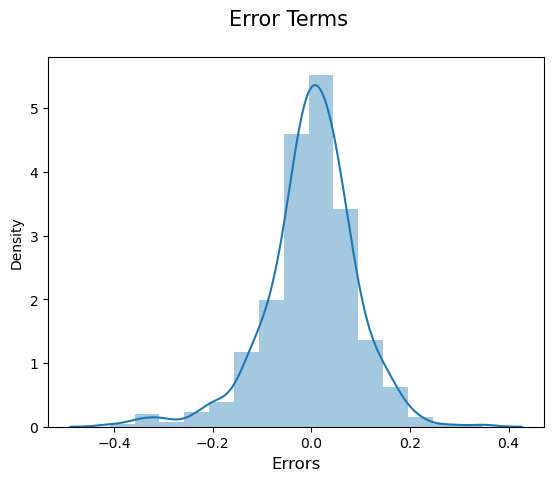

In [586]:
fig = plt.figure()
sns.distplot((y_train-y_train_cnt),bins =15)                                                        #plotting error terms 
fig.suptitle('Error Terms',fontsize= 15)                                 
plt.xlabel('Errors',fontsize =12)

1. Error terms as normally distributes with mean equal 0

## Making Predictions

In [587]:
num_vars = ['mnth','yr','holiday','weekday','workingday','temp','atemp','hum','windspeed','weathersit_2','weathersit_3','season_2','season_3','season_4','cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test[num_vars]

,mnth,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4,cnt
184,0.545455,0.0,1.0,0.166667,0.0,0.831783,0.769660,0.657364,0.084219,1.0,0.0,0.0,1.0,0.0,0.692706
535,0.454545,1.0,0.0,0.500000,1.0,0.901354,0.842587,0.610133,0.153728,0.0,0.0,1.0,0.0,0.0,0.712034
299,0.818182,0.0,0.0,0.666667,1.0,0.511964,0.496145,0.837699,0.334206,1.0,0.0,0.0,0.0,1.0,0.303382
221,0.636364,0.0,0.0,0.500000,1.0,0.881625,0.795343,0.437098,0.339570,0.0,0.0,0.0,1.0,0.0,0.547400
152,0.454545,0.0,0.0,0.666667,1.0,0.817246,0.741471,0.314298,0.537414,0.0,0.0,1.0,0.0,0.0,0.569029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.000000,1.0,0.0,0.333333,1.0,0.519232,0.511907,0.756118,0.283397,0.0,0.0,0.0,0.0,1.0,0.757478
127,0.363636,0.0,0.0,0.000000,0.0,0.584649,0.577380,0.650923,0.069510,0.0,0.0,1.0,0.0,0.0,0.495973
640,0.818182,1.0,0.0,0.500000,1.0,0.745598,0.682653,0.817947,0.052115,1.0,0.0,0.0,0.0,1.0,0.868615
72,0.181818,0.0,0.0,0.166667,1.0,0.331557,0.332005,0.512107,0.203418,0.0,0.0,0.0,0.0,0.0,0.232858


In [588]:
y_test = df_test.pop('cnt')
X_test = df_test

In [592]:
# Now lets see our model making predictions
X_test_new = X_test.drop(["atemp","mnth"],axis =1)
X_test_new = sm.add_constant(X_test_new)


In [593]:
y_pred= lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

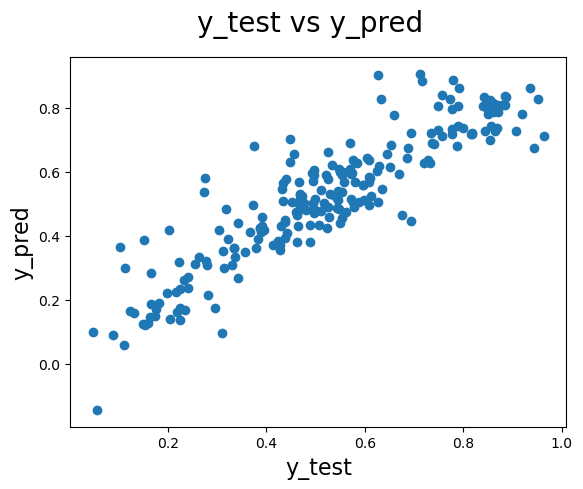

In [594]:
fig= plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize =20)  
plt.xlabel('y_test', fontsize=16)       # X label  
plt.ylabel('y_pred',fontsize =16)       # y label


## Observations
1. The model is following a regression straight line